In [175]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [176]:

pressure =ctrl.Antecedent(np.arange(0, 1001, 1), 'pressure')
sliding_distance =ctrl.Antecedent(np.arange(1, 16, 1), 'sliding_distance')
thermo = ctrl.Consequent(np.arange(0, 101, 1), 'thermo')

pressure.automf(3)
sliding_distance.automf(3)

thermo['low'] = fuzz.trimf(thermo.universe, [0, 0, 30])
thermo['medium'] = fuzz.trimf(thermo.universe, [0, 30, 70])
thermo['high'] = fuzz.trimf(thermo.universe, [30, 70, 100])

/home/monika/.local/lib/python3.6/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


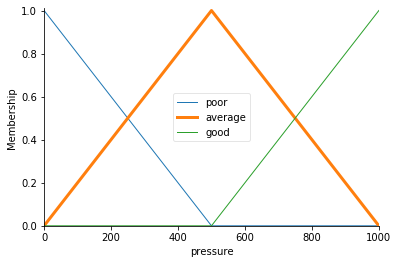

In [177]:
pressure['average'].view()

/home/monika/.local/lib/python3.6/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


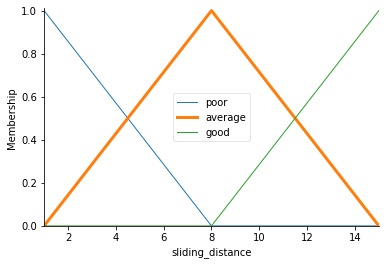

In [178]:
sliding_distance['average'].view()


/home/monika/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


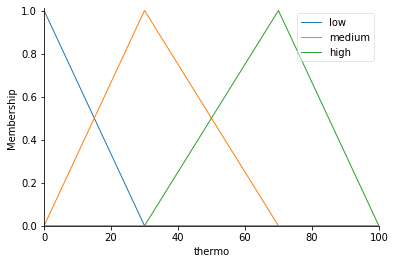

In [179]:
thermo.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07f3fa81d0>)

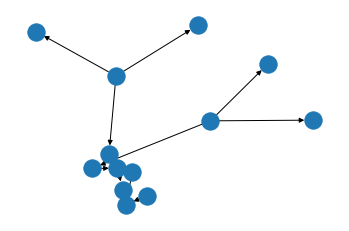

In [180]:
rule1 = ctrl.Rule(pressure['poor'] | sliding_distance['poor'], thermo['low'])
rule2 = ctrl.Rule(sliding_distance['average'], thermo['medium'])
rule3 = ctrl.Rule(sliding_distance['good'] | pressure['good'], thermo['high'])

rule1.view()

In [181]:
fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [182]:
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [183]:
# Passing inputs to the ControlSystem using Antecedent labels with Pythonic API
fuzzy.input['pressure'] = 480
fuzzy.input['sliding_distance'] = 15

# Crunch the numbers
fuzzy.compute()

Procentage share of thermo-mechanical fatigue: 64.97741412354416


/home/monika/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


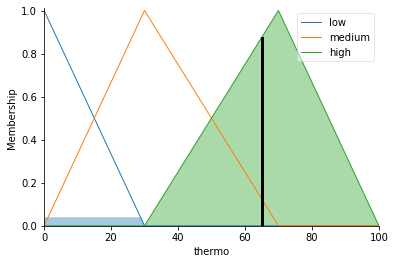

In [184]:
print('Procentage share of thermo-mechanical fatigue:', (fuzzy.output['thermo']))
thermo.view(sim=fuzzy)

#udział procentowy thermo-mechanical fatigue